## **2.1 Images**

In [1]:
import torchvision.datasets as datasets
import matplotlib.pyplot as plt 
import torchvision.transforms as transforms
import torch

##### Download the MNIST dataset using the torchvision library and create a subset of the dataset containing 1,000 samples. Each sample will include a 28 × 28 pixel image, along with a single integer value denoting the sample’s respective class (number).

In [2]:
mnistdataset = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())

subset = torch.utils.data.Subset(mnistdataset,range(1000))
#print(type(mnist_subset))

type(mnistdataset)

torchvision.datasets.mnist.MNIST

##### Plot a histogram of classes in your subset of MNIST.

In [3]:
# test function
# count = 0
# for i in range(len(subset)):
#     print(subset[i][1])
#     if (subset[i][1] == 0):
#         count += 1
# print("count: ", count)

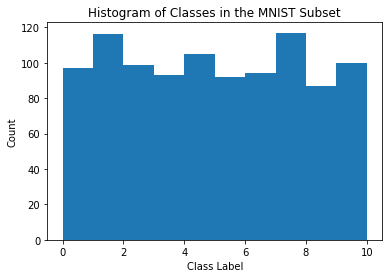

In [4]:
labels = [subset[i][1] for i in range(len(subset))]
plt.hist(labels, bins=range(11))
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.title('Histogram of Classes in the MNIST Subset')
plt.show()

##### Use the einops python package to ’batch’ the subset of MNIST images. Each batch should contain 25 different samples. Hint: The subset of MNIST image data should change dimensions from [1000, 28, 28] → [Number of Batches, Batch Size, 1, 28, 28] 
##### Context: Deep learning models operate over batches of samples. This rapidly speeds up computation as the forward pass runs parallel across the batch dimension.Batching also can improve optimization and provides the S in SGD (Stochastic Gradient Descent). Additionally, neural networks expect a channel dimension for image data. MNIST is grayscale so it only contains one channel, but other images can contain color, in which case they will have three channels, RGB.

In [5]:
import numpy as np
from einops import rearrange 

batchSize = 25
# mnist_dataset.shape
#images = einops.rearrange()
index_arr = np.random.choice(60000, 1000)
sub_images = mnistdataset.train_data[index_arr,:,:]
new_batch = rearrange(sub_images,'(b1 b2) h w -> b1 b2 1 h w',b2=25)
print(new_batch.shape)

torch.Size([40, 25, 1, 28, 28])


/opt/miniconda3/envs/COMS577/lib/python3.10/site-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


##### Randomly select an MNIST image sample and, using matplotlib, plot it in three dimensions. The x and y-axis’ should be the respective pixel locations, and the z-axis should be the pixel intensity.

In [6]:
import random
mnist = mnistdataset._load_data()

    

In [7]:
image, label = mnist
random.seed(0)
index = np.random.randint(0, 28)
x = []
y = []
z = []
for i in range(len(image[index])):
    for j in range(len(image[index])):
        temp = int(image[index][i,j])
        x.append(i)
        y.append(j)
        z.append(temp)


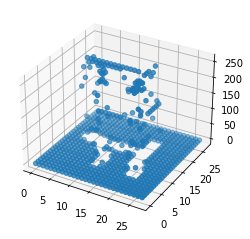

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# z = image[index]
#print(z)
# ax.plot3D(x, y, z, 'gray')
ax.scatter(x, y, z)


In [9]:
# plt.imshow(image[index])
# image[index]

## 2.2 Time Series

##### Task: Load the data (energydata complete.csv) and perform the following analysis.

In [10]:
import pandas as pd 
data = pd.read_csv('energydata_complete.csv')
data

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


##### Plot the appliances energy consumption for whole period and a closer look at anyone week of consumption.

[60 60 50 ... 270 420 430]


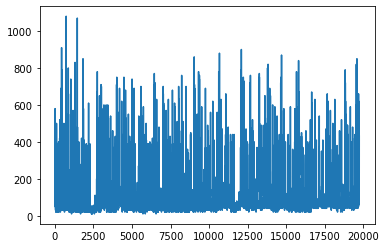

In [11]:
timedata_np = data.to_numpy()
print(timedata_np[:,1])
plt.plot( timedata_np[:,1])

In [12]:
print(timedata_np[42,0])
print(timedata_np[7*24*6+42,0])

2016-01-12 00:00:00
2016-01-19 00:00:00


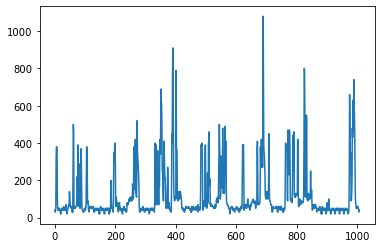

In [13]:
begin = 42
end = 7*24*6 + begin
sub = timedata_np[begin:end, 1]
plt.plot(sub)


In [14]:
data['date']

0        2016-01-11 17:00:00
1        2016-01-11 17:10:00
2        2016-01-11 17:20:00
3        2016-01-11 17:30:00
4        2016-01-11 17:40:00
                ...         
19730    2016-05-27 17:20:00
19731    2016-05-27 17:30:00
19732    2016-05-27 17:40:00
19733    2016-05-27 17:50:00
19734    2016-05-27 18:00:00
Name: date, Length: 19735, dtype: object

In [15]:
#data

##### Plot heatmap of hourly consumption of appliances for a week. An example heatmap looks like Figure 1.

/var/folders/hb/h501hgcx5pb6pm8x3wm9xs7m0000gn/T/ipykernel_23503/858671307.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  to_day = to.resample('H').sum()


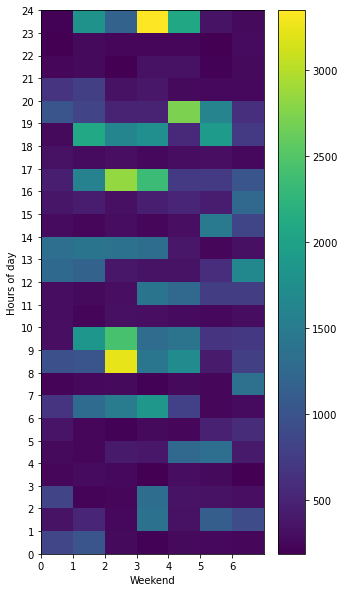

In [16]:
date = data["date"]
to = data.set_index(pd.DatetimeIndex(pd.to_datetime(date)))

plt.figure(figsize=(5,10))
to_day = to.resample('H').sum()
#to_day
week_data = to_day.loc['2016-01-12 00:00:00': '2016-01-18 23:50:00']
#week_data
week_data['Appliances']
week_data = np.reshape(week_data['Appliances'].values,(24,7))
#week_data
heatmap = plt.pcolormesh(week_data)
plt.yticks(np.arange(0,25))
plt.xticks(np.arange(0,7))
plt.xlabel("Weekend")
plt.ylabel("Hours of day")
#ax = plt.axes()
#ax.set_xticklabels([])
plt.colorbar(heatmap)
plt.show()

##### Plot the histogram of energy consumption of appliances.

Text(0.5, 0, 'Energy Consumption (Wh)')

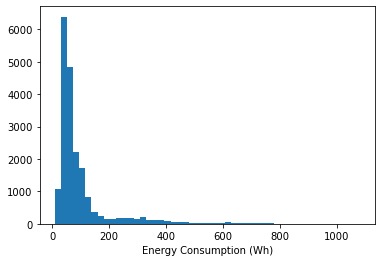

In [17]:
plt.hist(data['Appliances'],bins = 50)
plt.xlabel('Energy Consumption (Wh)')


##### Construct a feature variable NSM (no. of seconds from midnight) and plot energy consumption vs. NSM.

In [18]:

#print(data["date"])
time = data["date"][6][-8:]
print(time)
second = int(time[-2:])+ int(time[-5:-3])*60+ int(time[0:2])*3600

# convert date to nsm 
def to_NSM(date):
    time = date[-8:]
    sec = int(time[-2:])+ int(time[-5:-3])*60+ int(time[0:2])*3600
    return sec
#print(to_NSM(data["date"][6]))


18:00:00


In [19]:
data["NSM"] = data["date"].apply(lambda x: to_NSM(x))
data

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433,61200
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195,61800
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668,62400
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389,63000
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097,63600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812,62400
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940,63000
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117,63600
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784,64200


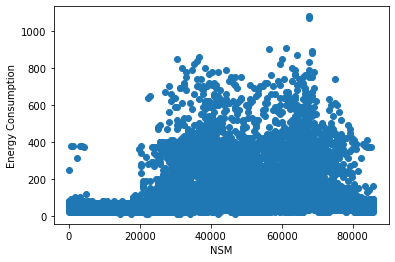

In [20]:
plt.plot(data['NSM'], data['Appliances'],"o")
plt.ylabel('Energy Consumption')
plt.xlabel('NSM')
plt.show()

##### Plot appliances energy consumption vs. Press mm Hg.

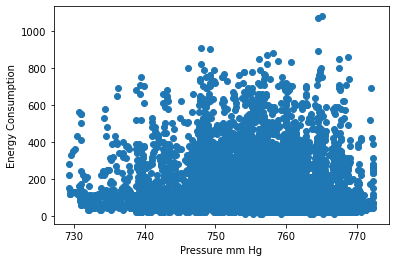

In [21]:
plt.plot(data['Press_mm_hg'], data['Appliances'],'o')
plt.ylabel('Energy Consumption')
plt.xlabel('Pressure mm Hg')
plt.show()

##### It is observed that the major contributing factors for the energy consumption among all other features is NSM and Press mm Hg. Comment on it.

##### Ans: When the pressure is between 740 and 770, the average of energy consumption is higher. Comparing the energy consumption vs. NSM plot ,and appliances energy consumption vs. Press mm Hg plot, the plots pattern are somehow similar, most points are at the same position on the plots. It is because the pressure value is increasing corresponding to time.

##### Task: Load the data and Compute the following descriptive statistics of the data:
##### 1. Mean
##### 2. Variance (or Standard Deviation)
##### 3. Median
##### 4. Kurtosis
##### 5. Skewness
##### 6. Range

In [22]:
data2 = pd.read_csv('airfoil_self_noise.dat',delimiter="\t",header=None)
data2.columns =["Frequency Hz","Angle of attack degrees","Chord length meters","Free-stream velocity meters per second","Suction side displacement thickness meters","Pressure Level"]
data2

,Frequency Hz,Angle of attack degrees,Chord length meters,Free-stream velocity meters per second,Suction side displacement thickness meters,Pressure Level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


In [23]:
data2.mean()

Frequency Hz                                  2886.380572
Angle of attack degrees                          6.782302
Chord length meters                              0.136548
Free-stream velocity meters per second          50.860745
Suction side displacement thickness meters       0.011140
Pressure Level                                 124.835943
dtype: float64

In [24]:
data2.var()

Frequency Hz                                  9.938717e+06
Angle of attack degrees                       3.502424e+01
Chord length meters                           8.749868e-03
Free-stream velocity meters per second        2.425116e+02
Suction side displacement thickness meters    1.729287e-04
Pressure Level                                4.759146e+01
dtype: float64

In [25]:
data2.median()

Frequency Hz                                  1600.000000
Angle of attack degrees                          5.400000
Chord length meters                              0.101600
Free-stream velocity meters per second          39.600000
Suction side displacement thickness meters       0.004957
Pressure Level                                 125.721000
dtype: float64

In [26]:
data2.kurtosis()

Frequency Hz                                  5.708685
Angle of attack degrees                      -0.412951
Chord length meters                          -1.037964
Free-stream velocity meters per second       -1.563951
Suction side displacement thickness meters    2.218903
Pressure Level                               -0.314187
dtype: float64

In [27]:
data2.skew()

Frequency Hz                                  2.137084
Angle of attack degrees                       0.689164
Chord length meters                           0.457457
Free-stream velocity meters per second        0.235852
Suction side displacement thickness meters    1.702165
Pressure Level                               -0.418952
dtype: float64